# Natural Language Processing with Diaster tweets Classification

### Kaggle Competition Dataset - Pixeltests

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [48]:
train_data = pd.read_csv('/content/drive/MyDrive/NLPbasic/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/NLPbasic/test.csv')

In [ ]:
train_data.shape, test_data.shape

((7613, 5), (3263, 4))

In [52]:
train_data.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [ ]:
X_t = train_data.drop('target', axis=1)
y_t = train_data['target']
df = pd.concat([X_t, test_data], axis=0)

# Expolaratory Data Analysis

In [ ]:
train_data[train_data.text.str.contains('@')]

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0
43,63,ablaze,NaN,SOOOO PUMPED FOR ABLAZE ???? @southridgelife,0
54,78,ablaze,Abuja,Noches El-Bestia '@Alexis_Sanchez: happy to se...,0
57,81,ablaze,"Sao Paulo, Brazil",Set our hearts ablaze and every city was a gif...,0
...,...,...,...,...,...
7577,10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0
7578,10830,wrecked,NaN,@jt_ruff23 @cameronhacker and I wrecked you both,0
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0
7596,10851,NaN,NaN,RT @LivingSafely: #NWS issues Severe #Thunders...,1


**Target variable**

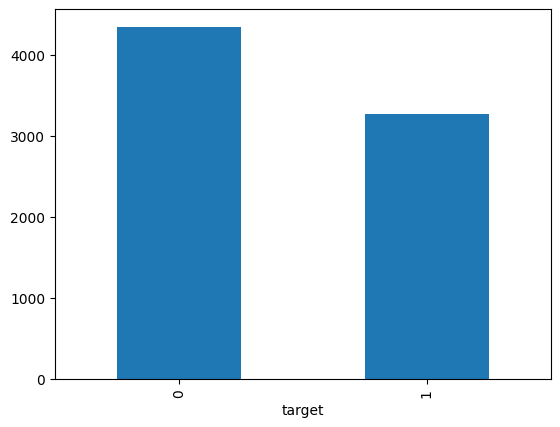

In [ ]:
train_data.target.value_counts().plot(kind='bar');

**Missing values**

In [ ]:
# missing values
train_data.isnull().sum()

,0
id,0
keyword,61
location,2533
text,0
target,0


## Preprocessing

**Data Cleaning**

In [ ]:
import re
import string
from nltk.corpus import stopwords

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub(r'@\w+', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = " ".join([word for word in text.split() if word not in stopwords.words('english')])
    return text

In [ ]:
df.text = df.text.apply(lambda x : clean_text(x))

In [ ]:
df.text.head()

,text
0,deeds reason earthquake may allah forgive us
1,forest fire near la ronge sask canada
2,residents asked shelter place notified officer...
3,people receive wildfires evacuation orders cal...
4,got sent photo ruby alaska smoke wildfires pou...



**Word Lemmatization**

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

In [ ]:
df.text = df.text.apply(lambda x : lemmatize_text(x))

In [ ]:
df.text.head()

,text
0,deed reason earthquake may allah forgive u
1,forest fire near la ronge sask canada
2,resident asked shelter place notified officer ...
3,people receive wildfire evacuation order calif...
4,got sent photo ruby alaska smoke wildfire pour...


**Number of unique words**


In [ ]:
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens
dn = df.text.apply(lambda x : tokenize_text(x))
unique_words = set(word for sublist in dn for word in sublist)
num_unique_words = len(unique_words)
print("unique words:", num_unique_words)

unique words: 16843


# Text Vectorization

**Term Frequency - Inverse Document Frequency (TF-IDF)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train

X_train_tfidf = tfidf(df.text)

**Decomposition - PCA / TruncatedSVD**

In [ ]:
from sklearn.decomposition import TruncatedSVD, PCA
import matplotlib.patches as mpatches
import matplotlib

decom = TruncatedSVD(n_components=2)
decom.fit(X_train_tfidf)
X_train_tfidf = decom.transform(X_train_tfidf)

tf_X_train = X_train_tfidf[:len(train_data)]
tf_X_test = X_train_tfidf[len(train_data):]

Xtr = pd.DataFrame()
Xtr['x'] = tf_X_train[:, 0]
Xtr['y'] = tf_X_train[:, 1]
Xtr['target'] = y_t

Xtest = pd.DataFrame()
Xtest['x'] = tf_X_test[:, 0]
Xtest['y'] = tf_X_test[:, 1]

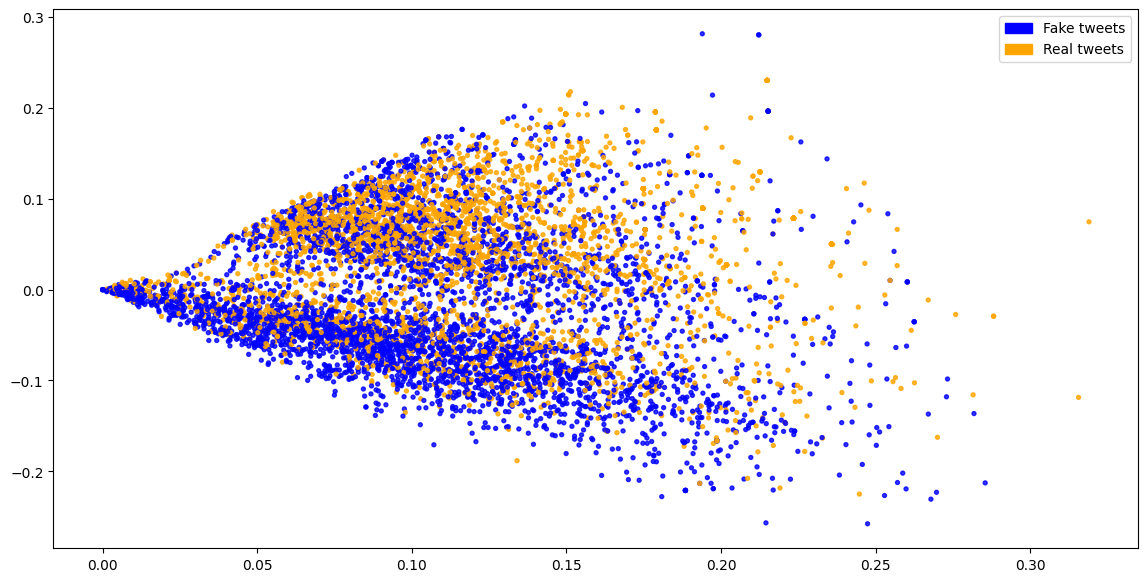

In [ ]:
fig = plt.figure(figsize=(14, 7))
plt.scatter(Xtr['x'], Xtr['y'], s=8, alpha=.8, c=Xtr['target'], cmap=matplotlib.colors.ListedColormap(['blue', 'orange']))
orange_patch = mpatches.Patch(color='blue', label='Fake tweets')
blue_patch = mpatches.Patch(color='orange', label='Real tweets')
plt.legend(handles=[orange_patch, blue_patch])
plt.show()

# Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_X_train, y_t, test_size=0.2, random_state=42)

**function for plotting decision regions**

In [ ]:
from mlxtend.plotting import plot_decision_regions

def decision_region(model):
  fig, ax = plt.subplots(figsize=(14, 7))
  scatter_kwargs = {'s': 9, 'edgecolor': None, 'alpha': 0.8}
  plot_decision_regions(X_test, y_test.to_numpy(), clf=model, markers = 'o', legend=2, zoom_factor=2, scatter_kwargs=scatter_kwargs)
  orange_patch = mpatches.Patch(color='lightblue', label='Fake tweets')
  blue_patch = mpatches.Patch(color='orange', label='Real tweets')
  plt.legend(handles=[orange_patch, blue_patch])
  plt.ylim(-0.3, 0.3)
  plt.xlim(-0.03, 0.3)
  plt.show()

###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6454366382140512


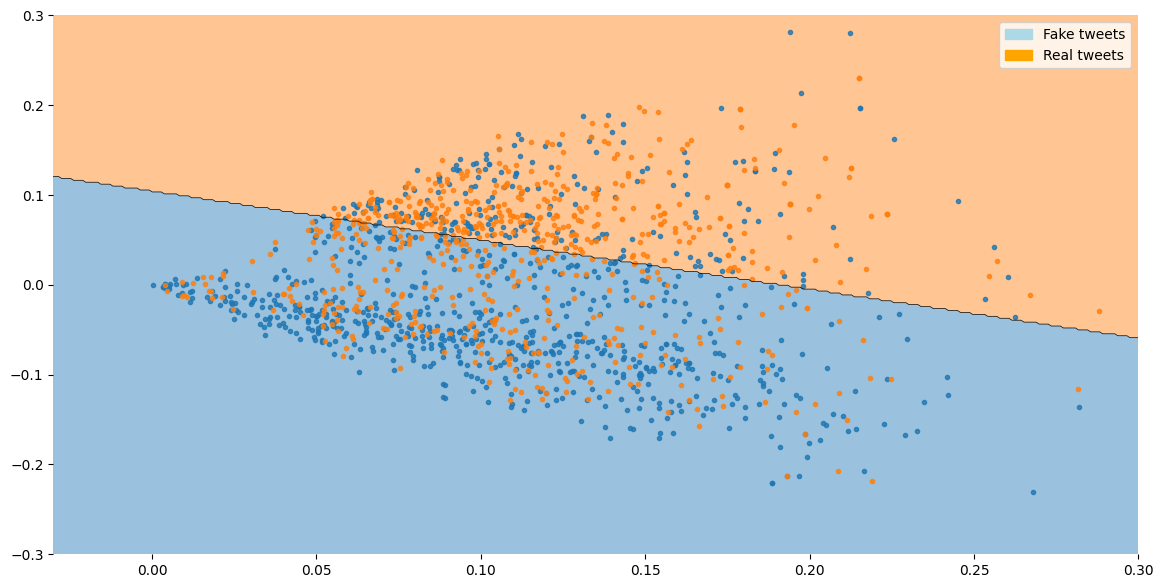

In [ ]:
decision_region(lr)

###**Support Vector Machine**

In [ ]:
# Support Vector Classifier
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6526592252133946


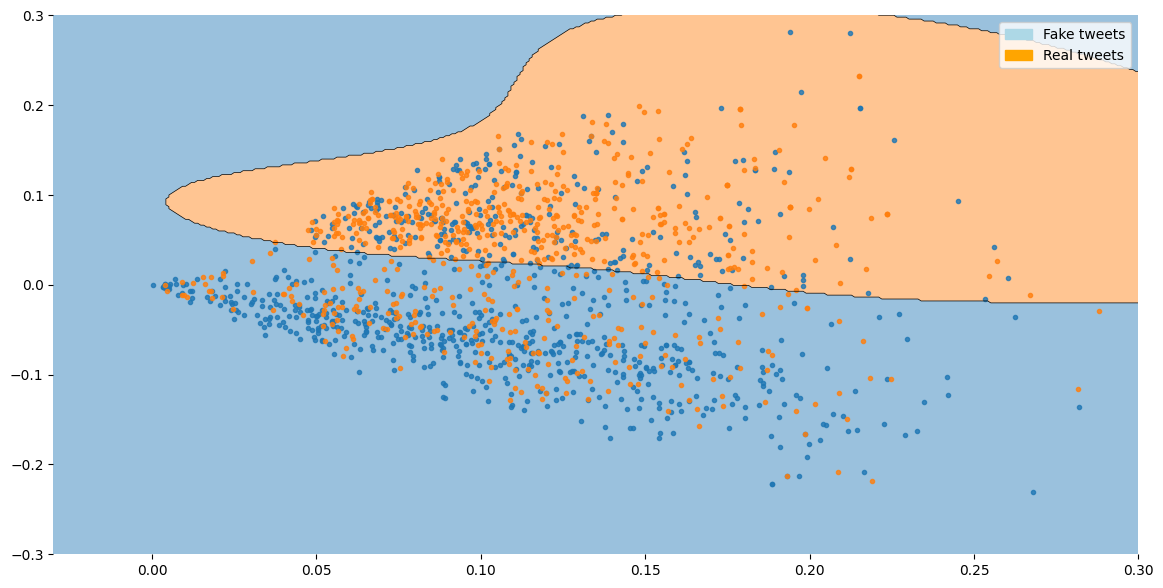

In [ ]:
decision_region(svm)

###**KNN Classifier**

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6316480630334865


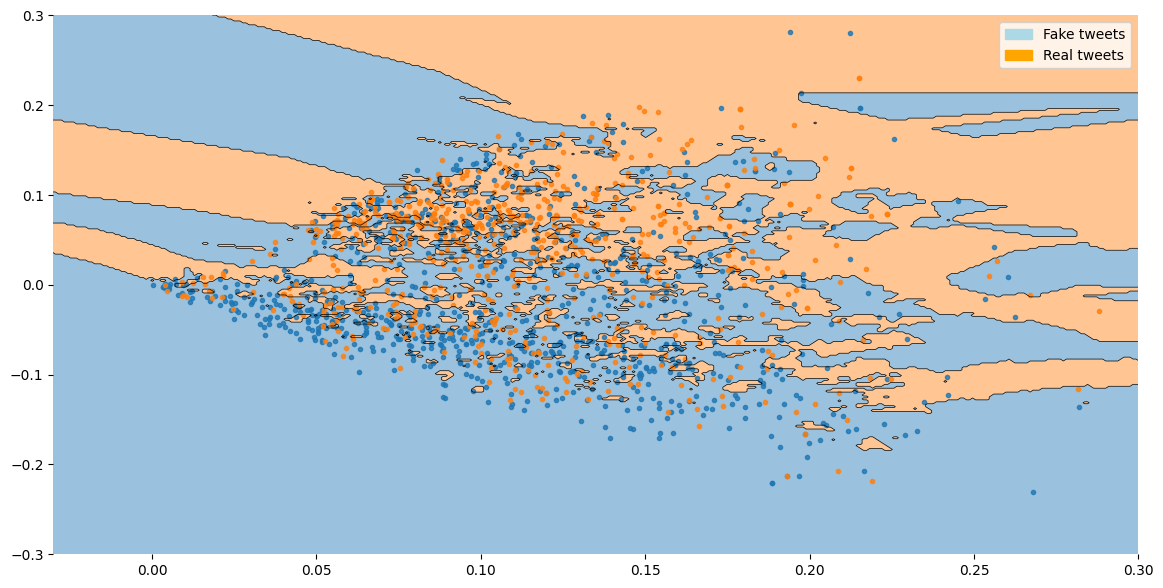

In [ ]:
decision_region(knn)

**Decision Tree Classifier**

In [ ]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.623768877216021


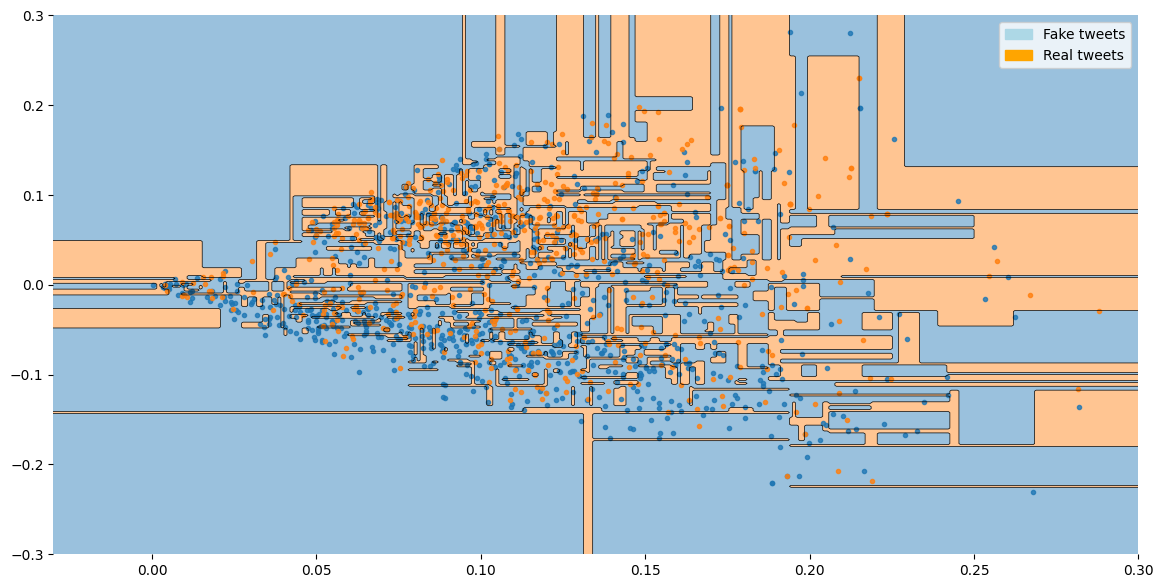

In [ ]:
decision_region(dt)

###**AdaBoost Classifier**

In [ ]:
# adaboost classifier

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.6474064346684176


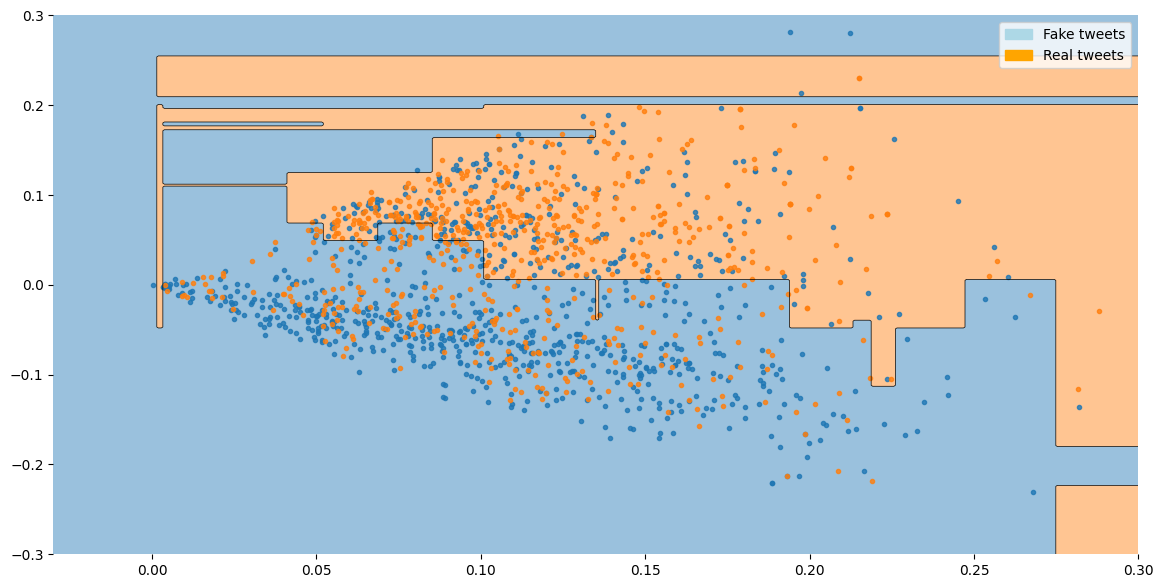

In [ ]:
decision_region(ada)

###**Random Forest Classifier**

In [ ]:
# random forest classifier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6421536441234406


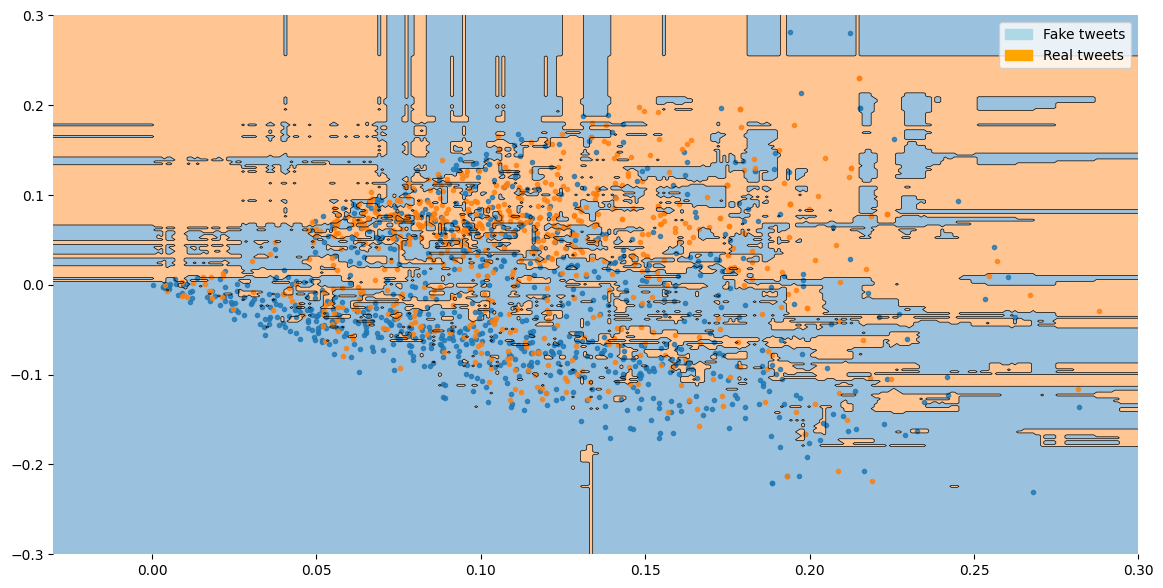

In [ ]:
decision_region(rf)

###**XgBoost Classifier**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6552856204858831


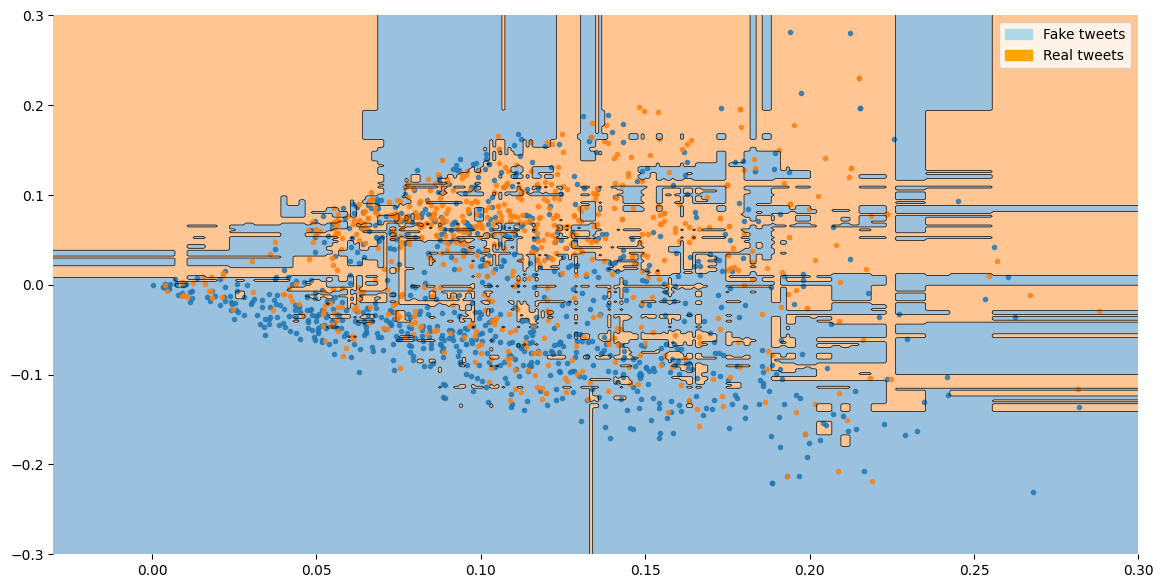

In [ ]:
decision_region(xgb)

# Deep Learning

## Deep Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

In [ ]:
# Designing new neural architecture
model_ann = Sequential()
model_ann.add(InputLayer(shape=(X_train.shape[1],)))
model_ann.add(Dense(100, activation='sigmoid'))
model_ann.add(BatchNormalization())
model_ann.add(Dropout(0.3))
model_ann.add(Dense(60, activation='sigmoid'))
model_ann.add(BatchNormalization())
model_ann.add(Dropout(0.3))
model_ann.add(Dense(30, activation='sigmoid'))
model_ann.add(BatchNormalization())
model_ann.add(Dropout(0.3))
model_ann.add(Dense(1, activation='sigmoid'))
model_ann.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")

In [ ]:
history = model_ann.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5838 - loss: 0.7711 - val_accuracy: 0.5739 - val_loss: 0.6827
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6131 - loss: 0.6870 - val_accuracy: 0.5739 - val_loss: 0.6726
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6287 - loss: 0.6667 - val_accuracy: 0.6422 - val_loss: 0.6423
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6337 - loss: 0.6563 - val_accuracy: 0.6369 - val_loss: 0.6354
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6253 - loss: 0.6540 - val_accuracy: 0.6520 - val_loss: 0.6302
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6459 - loss: 0.6419 - val_accuracy: 0.6487 - val_loss: 0.6305
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6476 - loss: 0.6365 - val_accuracy: 0.6494 - val_loss: 0.6291
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6535 - loss: 0.6298 - val_accuracy: 0.

30625/30625 ━━━━━━━━━━━━━━━━━━━━ 40s 1ms/step


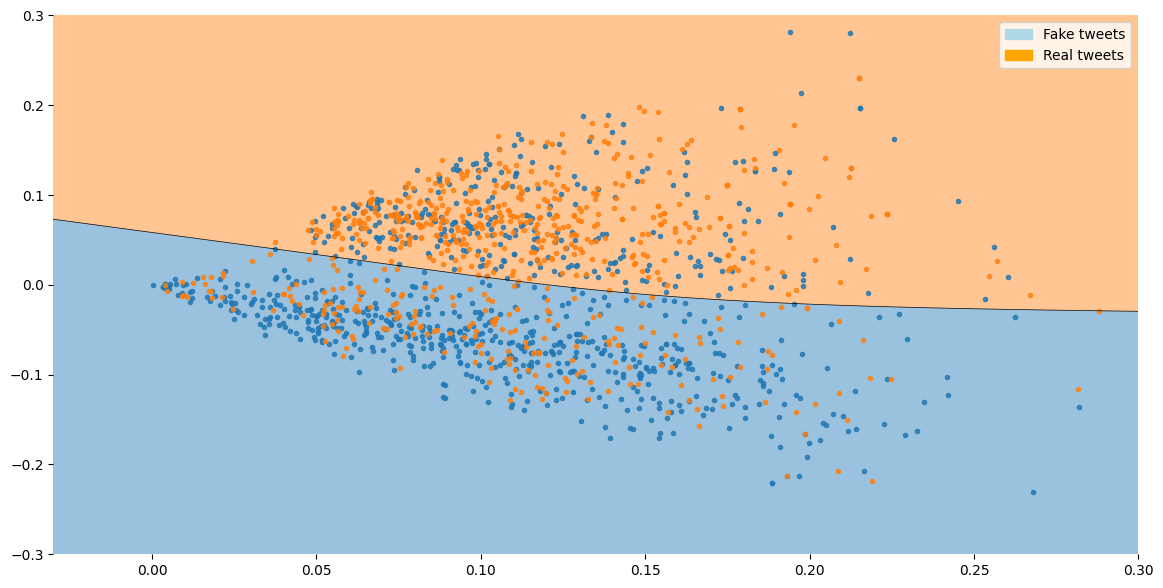

In [ ]:
decision_region(model_ann)

In [ ]:
tf_X_test

array([], shape=(0, 2), dtype=float64)

In [ ]:
prediction_ann = model_ann.predict(tf_X_test)

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [ ]:
binary_outputs = np.where(prediction_ann >= 0.5, 1, 0)
binary_outputs = binary_outputs.flatten()

sub = pd.DataFrame()
sub['id'] = test_data['id']
sub['target'] = binary_outputs
sub.to_csv('submission.csv', index=False)

**Kaggle Accuracy Score: 0.65277**

## Recurrant Neural Network - RNN

In [ ]:
Xrnn_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
Xrnn_val = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Designing new neural architecture
model_rnn = Sequential()
#model_rnn.add(InputLayer(shape=X_train.shape))
model_rnn.add(SimpleRNN(units=32, return_sequences=True, input_shape=(1, 2)))
model_rnn.add(SimpleRNN(units=32, return_sequences=True))
model_rnn.add(SimpleRNN(units=32))
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model_rnn.fit(Xrnn_train, y_train, epochs=10, batch_size=32, validation_data=(Xrnn_val, y_test))

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6001 - loss: 0.6551 - val_accuracy: 0.6559 - val_loss: 0.6360
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6572 - loss: 0.6287 - val_accuracy: 0.6428 - val_loss: 0.6355
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6628 - loss: 0.6217 - val_accuracy: 0.6461 - val_loss: 0.6427
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6399 - loss: 0.6363 - val_accuracy: 0.6513 - val_loss: 0.6383
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6443 - loss: 0.6359 - val_accuracy: 0.6481 - val_loss: 0.6391
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6422 - loss: 0.6388 - val_accuracy: 0.6533 - val_loss: 0.6361
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6498 - loss: 0.6325 - val_accuracy: 0.6533 - val_loss: 0.6362
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6557 - loss: 0.6253 - val_accuracy: 0.

In [ ]:
prediction_rnn = model_rnn.predict(tf_X_test.reshape(tf_X_test.shape[0], 1, tf_X_test.shape[1]))

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [ ]:
binary_outputs = np.where(prediction_rnn >= 0.5, 1, 0)
binary_outputs = binary_outputs.flatten()

sub = pd.DataFrame()
sub['id'] = test_data['id']
sub['target'] = binary_outputs
sub.to_csv('submission.csv', index=False)

**Kaggle Accuracy Score: 0.65461**

## Long Short Term Memory - LSTM

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Create a Tokenizer
tokenizer = Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(df.text)

# Convert Text to Sequences
sequences = tokenizer.texts_to_sequences(df.text)

# Padding
max_sequence_length = 100  # Adjust as needed
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

In [ ]:
padded_sequences

array([[   0,    0,    0, ..., 1802, 3228,    6],
       [   0,    0,    0, ..., 7072, 7073, 1125],
       [   0,    0,    0, ...,  480,  360, 1094],
       ...,
       [   0,    0,    0, ...,  386,  341, 1127],
       [   0,    0,    0, ...,  181, 1543, 1658],
       [   0,    0,    0, ...,   13,   85, 3160]], dtype=int32)

In [ ]:
final_X_train = padded_sequences[:len(train_data)]
final_X_test = padded_sequences[len(train_data):]

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train2, X_val2, y_train2, y_val2 = train_test_split(final_X_train, y_t, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, TimeDistributed

# Assuming you have your preprocessed text data and word embeddings

# Model Architecture
model = Sequential()
model.add(Embedding(input_dim=num_unique_words, output_dim=100))
model.add(LSTM(units=64, return_sequences=True))
model.add(TimeDistributed(Dense(32, activation='relu')))  # Deep Tense Layer
model.add(LSTM(units=32))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train  the model
model.fit(X_train2, y_train2, epochs=10, batch_size=32, validation_data=(X_val2,  y_val2))


Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 49s 192ms/step - accuracy: 0.6276 - loss: 0.6256 - val_accuracy: 0.7853 - val_loss: 0.4608
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 37s 194ms/step - accuracy: 0.8902 - loss: 0.2840 - val_accuracy: 0.7728 - val_loss: 0.5121
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 188ms/step - accuracy: 0.9501 - loss: 0.1528 - val_accuracy: 0.7689 - val_loss: 0.6057
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 38s 200ms/step - accuracy: 0.9663 - loss: 0.1067 - val_accuracy: 0.7544 - val_loss: 0.7089
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 36s 189ms/step - accuracy: 0.9707 - loss: 0.0877 - val_accuracy: 0.7525 - val_loss: 0.7889
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 43s 197ms/step - accuracy: 0.9802 - loss: 0.0574 - val_accuracy: 0.7485 - val_loss: 0.8543
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 199ms/step - accuracy: 0.9807 - loss: 0.0483 - val_accuracy: 0.7538 - val_loss: 1.0393
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 39s 189ms/step - accuracy: 0.9766 - loss: 0

In [ ]:
prediction_lstm = model.predict(final_X_test)

102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step


In [ ]:
prediction_lstm

array([[0.48500848],
       [0.85162145],
       [0.9997283 ],
       ...,
       [0.9994021 ],
       [0.09310679],
       [0.9986815 ]], dtype=float32)

In [ ]:
binary_outputs = np.where(prediction_lstm >= 0.5, 1, 0)
binary_outputs = binary_outputs.flatten()

sub = pd.DataFrame()
sub['id'] = test_data['id']
sub['target'] = binary_outputs
sub.to_csv('submission.csv', index=False)

**Kaggle Accuracy Score: 0.76279**

**Kaggle Rank: 823**

# Transformers

## Bi-directional Encoder Representations from Transformers - BERT

In [ ]:
dfb = test_data.copy()
dfb.text = dfb.text.apply(lambda x : clean_text(x))
dfb.text = dfb.text.apply(lambda x : lemmatize_text(x))

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

# Load the pre-trained model and tokenizer
model_name  = "khairi/bert-tweet-disaster"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
b_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [ ]:
def preprocess_text(text):
  encoded_text = b_tokenizer(text, return_tensors="pt")
  return encoded_text

dfb["encoded_text"] = dfb["text"].apply(preprocess_text)

In [ ]:
def predict_bert(text):

  with torch.no_grad():
    outputs = model(**text)
    logits = outputs.logits

  # Apply softmax to get probabilities for each class
  probabilities = torch.softmax(logits, dim=-1)

  # Get the predicted class (0 for not disaster, 1 for disaster)
  predicted_class = torch.argmax(probabilities, dim=-1)
  return predicted_class

In [ ]:
dfb['target'] = dfb["encoded_text"].apply(predict_bert)
dfb.target = dfb.target.apply(lambda x : x.item())
dfb[['id','target']].to_csv('submission.csv', index=False)

**Kaggle Accuracy Score: 0.80723**

**Kaggle Rank: 319**

# Generative AI

## Prompt Engineering - Google Gemini 1.5 API

**importing Google Gemini 1.5 API**

In [ ]:
import google.generativeai as genai

**Prompts and inference**

In [ ]:
from tqdm import tqdm

flash = genai.GenerativeModel('gemini-1.5-flash')
prompt = "check if the given tweet is about disaster \
          if the given tweet is about disaster return 1, else return 0\
          reply with only the above numbers and nothin else"
final_test_data = test_data[['id','text']]
final_test_data['target'] = 0

for i in tqdm(range(test_data.shape[0])):
  final_test_data.iloc[i, 2] = flash.generate_content(prompt + test_data.iloc[i, 1])

100%|██████████| 3263/3263 [00:00<00:00, 836706.85it/s]


In [ ]:
final_test_data.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


**Accuracy Score: 0.99969**

**Kaggle Rank: 21**